# 1.环境配置


<b>1.1-基本软硬件环境查看：GPU信息，Python版本</b>

In [1]:
# 查看GPU相关信息（CUDA）
!nvidia-smi

Sat Aug 31 16:18:17 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  On   | 00000000:00:0D.0 Off |                    0 |
| N/A   30C    P0    24W / 250W |      0MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# 查看python版本（一般在华为云ModelArts平台上有显示，如果已经是python3.9，可跳过 过程1.2）
!python --version

Python 3.7.10


<b>1.2-设置python版本为3.9.0</b>

In [1]:
%%capture captured_output
!/home/ma-user/anaconda3/bin/conda create -n python-3.9.0 python=3.9.0 -y --override-channels --channel https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
!/home/ma-user/anaconda3/envs/python-3.9.0/bin/pip install ipykernel

In [2]:
import json
import os

data = {
   "display_name": "python-3.9.0",
   "env": {
      "PATH": "/home/ma-user/anaconda3/envs/python-3.9.0/bin:/home/ma-user/anaconda3/envs/python-3.7.10/bin:/modelarts/authoring/notebook-conda/bin:/opt/conda/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/home/ma-user/modelarts/ma-cli/bin:/home/ma-user/modelarts/ma-cli/bin"
   },
   "language": "python",
   "argv": [
      "/home/ma-user/anaconda3/envs/python-3.9.0/bin/python",
      "-m",
      "ipykernel",
      "-f",
      "{connection_file}"
   ]
}

if not os.path.exists("/home/ma-user/anaconda3/share/jupyter/kernels/python-3.9.0/"):
    os.mkdir("/home/ma-user/anaconda3/share/jupyter/kernels/python-3.9.0/")

with open('/home/ma-user/anaconda3/share/jupyter/kernels/python-3.9.0/kernel.json', 'w') as f:
    json.dump(data, f, indent=4)

<b>注：以上代码运行完成后，需要重新设置 kernel 为python-3.9.0，然后kernel会自动重启 </b><br>
然后查看python版本，显示为Python 3.9.0说明环境目前配置正常，进入1.3

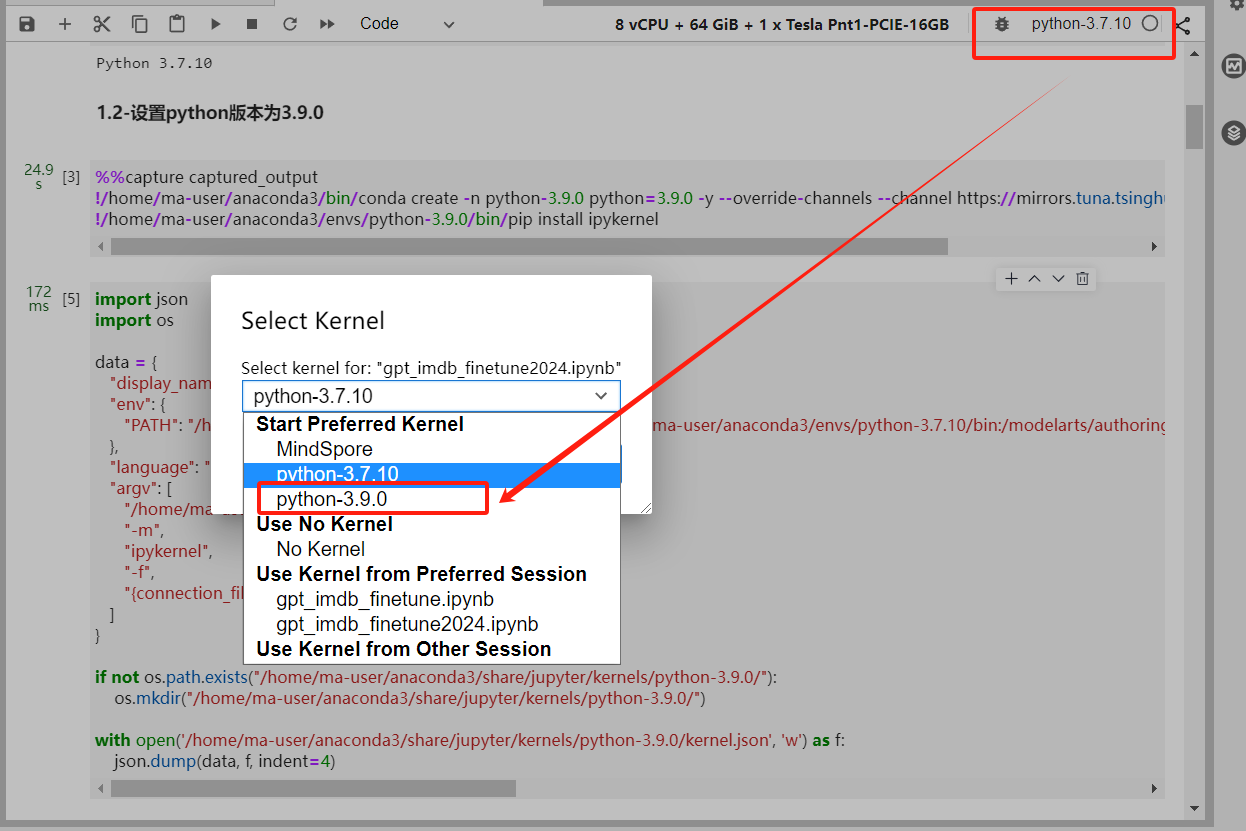

In [1]:
!python --version

Python 3.9.0


<b>1.3-安装MindSpore框架和MindNLP套件</b>

在MindSpore官网的安装文档中获取mindspore的pip安装命令：https://www.mindspore.cn/install
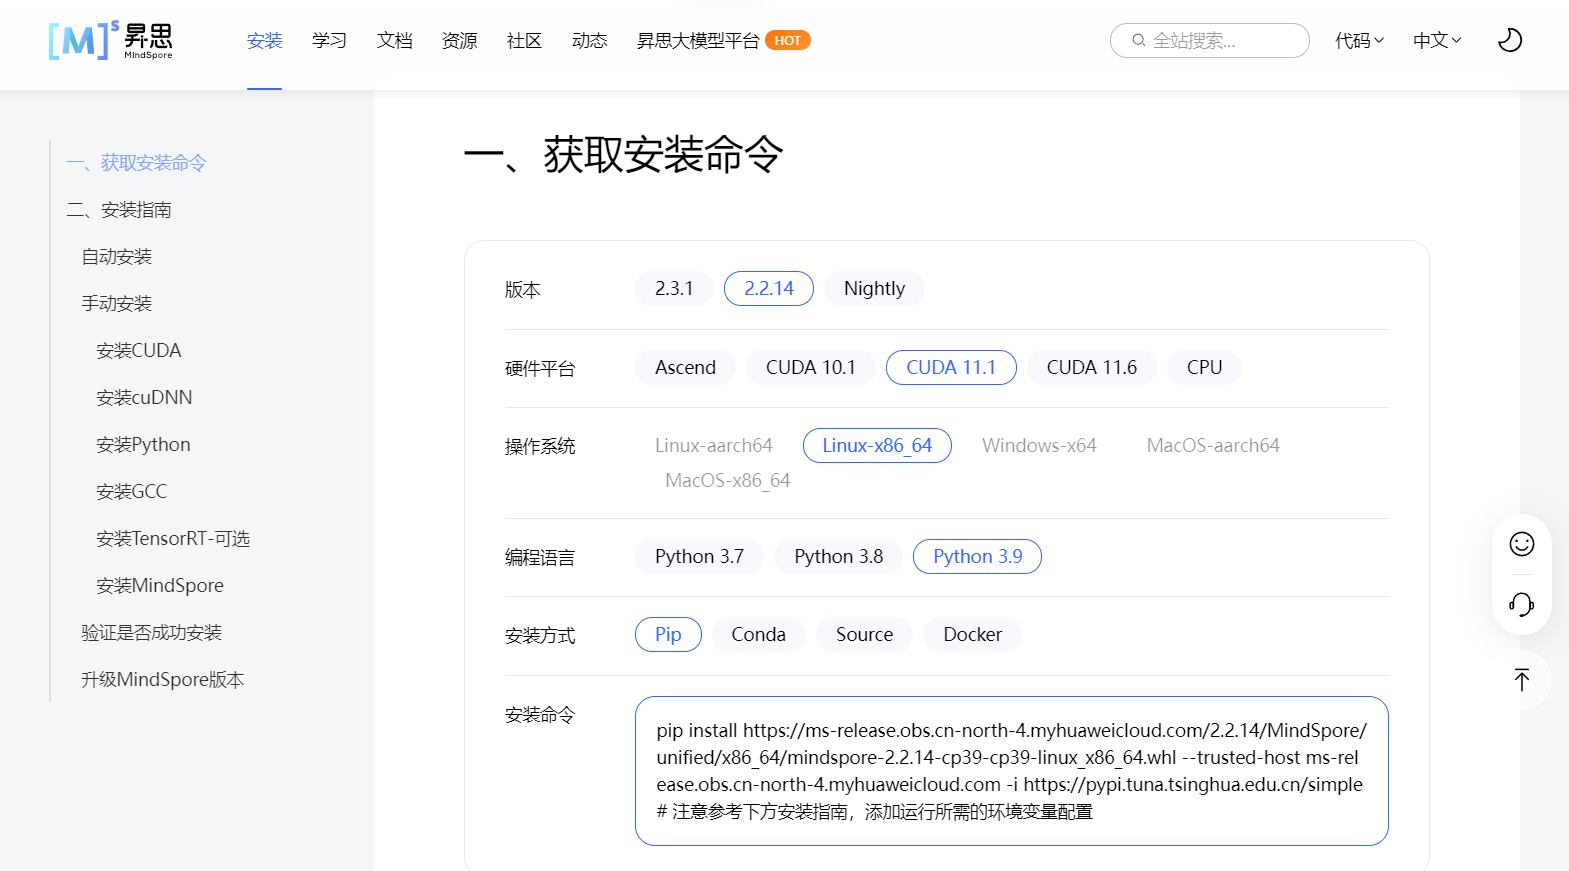

In [1]:
!pip install https://ms-release.obs.cn-north-4.myhuaweicloud.com/2.2.14/MindSpore/unified/x86_64/mindspore-2.2.14-cp39-cp39-linux_x86_64.whl --trusted-host ms-release.obs.cn-north-4.myhuaweicloud.com -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 743.0/743.0 MB 68.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 121.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 135.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 181.3 MB/s eta 0:00:0000:01


下载 MindNLP套件
<pre>
    MindNLP是一个基于MindSpore的开源自然语言处理（NLP）库，集成了多种先进的NLP技术和算法，支持多种语言（包括中文、英文、法文、德文等），支持多种NLP任务，如语言模型、机器翻译、问答、情感分析、序列标记、摘要等。
</pre>
更多MindNLP的相关信息和学习文档见其官网：https://mindnlp.cqu.ai/zh/

In [2]:
!pip install mindnlp

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.9/775.9 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 78.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 68.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 kB 16.8 MB/s

# 2.数据处理

In [3]:
import os

import mindspore
from mindspore.dataset import text, GeneratorDataset, transforms
from mindspore import nn

from mindnlp.dataset import load_dataset

/home/ma-user/anaconda3/envs/python-3.9.0/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.775 seconds.
Prefix dict has been built successfully.


<pre>
        mindnlp.dataset 的 load_dataset方法提供了一种加载数据集的快捷方式。通过该工具，用户可以从Hugging Face Hub或本地加载数据集，并将其转换为MindSpore支持的数据集格式(GeneratorDataset)，便于后续模型的训练和评估。
        接下来将加载 imdb 电影评论数据集，并将其分为训练集和测试集。
        IMDb数据集是一个广泛用于情感分析任务的数据集，它包含了大量的电影评论，每条评论都被标记为正面（积极）或负面（消极）。
</pre>

In [4]:
# load_dataset的split=['train', 'test']参数指定了要加载的数据集分割方式，即同时加载训练集和测试集。
imdb_ds = load_dataset('imdb', split=['train', 'test'])  # 加载后的数据集imdb_ds是一个字典，其中包含了'train'和'test'两个键
imdb_train = imdb_ds['train']
imdb_test = imdb_ds['test']

Generating unsupervised split: 100%|██████████| 50000/50000 [00:00<00:00, 141983.04 examples/s]


In [5]:
# get_dataset_size方法返回 the number of batches in an epoch，因为还未对训练集进行分批，所以这里返回训练集的样本总数
imdb_train.get_dataset_size()

25000

In [6]:
import numpy as np

def process_dataset(dataset, tokenizer, max_seq_len=512, batch_size=4, shuffle=False):
    is_ascend = mindspore.get_context('device_target') == 'Ascend' # 判断当前运行的设备目标（device target）是否为Ascend处理器
    def tokenize(text):
        """
        tokenize(text)将文本text转换为有效的token
        tokenizer的两个核心参数truncation=True, max_length=max_seq_len指定了一个输入文本超过了最大长度会被截断
        """
        if is_ascend:
            tokenized = tokenizer(text, padding='max_length', truncation=True, max_length=max_seq_len)
        else:
            tokenized = tokenizer(text, truncation=True, max_length=max_seq_len)
        return tokenized['input_ids'], tokenized['attention_mask']

    if shuffle:
        dataset = dataset.shuffle(batch_size)

    # map dataset，对数据集的文本数据进行token转换，对标签数据进行类型转换（转为int32类型）
    dataset = dataset.map(operations=[tokenize], input_columns="text", output_columns=['input_ids', 'attention_mask'])
    dataset = dataset.map(operations=transforms.TypeCast(mindspore.int32), input_columns="label", output_columns="labels")
    # batch dataset
    if is_ascend:
        dataset = dataset.batch(batch_size)
    else:
        dataset = dataset.padded_batch(batch_size, pad_info={'input_ids': (None, tokenizer.pad_token_id),
                                                             'attention_mask': (None, 0)})

    return dataset

In [7]:
from mindnlp.transformers import GPTTokenizer
# tokenizer，加载一个预训练的GPT分词器，这里指定了分词器将基于OpenAI的GPT模型的词汇表进行配置
gpt_tokenizer = GPTTokenizer.from_pretrained('openai-gpt')

# add sepcial token: <PAD>
special_tokens_dict = {
    "bos_token": "<bos>",   # <bos>（Begin of Sequence，序列开始）
    "eos_token": "<eos>",    # <eos>（End of Sequence，序列结束）
    "pad_token": "<pad>",   # 在需要将不同长度的序列填充到相同长度时使用的填充标记
}
num_added_toks = gpt_tokenizer.add_special_tokens(special_tokens_dict)
print(num_added_toks)

100%|██████████| 25.0/25.0 [00:00<00:00, 113kB/s]
797kB [00:00, 2.58MB/s]
448kB [00:00, 1.27MB/s]
1.21MB [00:00, 3.92MB/s]
656B [00:00, 1.88MB/s]                   
ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.


3


<pre>
    调用add_special_tokens方法将定义的特殊标记special_tokens_dict添加到分词器gpt_tokenizer的词汇表中。该方法接受一个字典作为参数，字典的键是特殊标记的名称，值是特殊标记的文本。方法返回添加的标记数量，这可以用于确认操作是否成功。
    添加特殊标记后，这些标记就可以被分词器识别，并在需要时用于文本编码（tokenization）和解码（detokenization）过程。
</pre>

In [8]:
# split train dataset into train and valid datasets
imdb_train, imdb_val = imdb_train.split([0.7, 0.3])

print(imdb_train.get_dataset_size(), imdb_val.get_dataset_size())

17500 7500


In [9]:
# 对训练集、验证集、测试集分别进行相同的数据处理；另外，训练集指定了打乱样本的顺序
dataset_train = process_dataset(imdb_train, gpt_tokenizer, shuffle=True)
dataset_val = process_dataset(imdb_val, gpt_tokenizer)
dataset_test = process_dataset(imdb_test, gpt_tokenizer)

In [10]:
next(dataset_train.create_tuple_iterator())

[Tensor(shape=[4, 298], dtype=Int64, value=
 [[  249,   812, 20699 ...   282,   278,  5895],
  [  616,   544,   566 ... 40480, 40480, 40480],
  [ 1782, 23129,   249 ... 40480, 40480, 40480],
  [  249,   759,   595 ... 40480, 40480, 40480]]),
 Tensor(shape=[4, 298], dtype=Int64, value=
 [[1, 1, 1 ... 1, 1, 1],
  [1, 1, 1 ... 0, 0, 0],
  [1, 1, 1 ... 0, 0, 0],
  [1, 1, 1 ... 0, 0, 0]]),
 Tensor(shape=[4], dtype=Int32, value= [0, 1, 0, 0])]

#### 至此，已加载并处理好了三个数据集：训练集dataset_train、验证集dataset_val、测试集dataset_test

# 3.预训练模型加载与训练
使用加载并处理好的imdb数据集对gpt预训练模型进行继续训练

In [11]:
from mindnlp.transformers import GPTForSequenceClassification
from mindspore.experimental.optim import Adam

from mindnlp._legacy.engine import Trainer, Evaluator
from mindnlp._legacy.engine.callbacks import CheckpointCallback, BestModelCallback
from mindnlp._legacy.metrics import Accuracy

In [12]:
# set bert config and define parameters for training
model = GPTForSequenceClassification.from_pretrained('openai-gpt', num_labels=2)
model.config.pad_token_id = gpt_tokenizer.pad_token_id
model.resize_token_embeddings(model.config.vocab_size + num_added_toks)  # num_added_toks为上述数据处理中成功添加的特殊标记数量

# 定义用于优化模型参数的优化器为Adam，初始学习率为 0.00002
optimizer = nn.Adam(model.trainable_params(), learning_rate=2e-5)

metric = Accuracy()   # 定义评估标准为准确率

# define callbacks to save checkpoints
ckpoint_cb = CheckpointCallback(save_path='checkpoint', ckpt_name='gpt_imdb_finetune', epochs=1, keep_checkpoint_max=2)
best_model_cb = BestModelCallback(save_path='checkpoint', ckpt_name='gpt_imdb_finetune_best', auto_load=True)

trainer = Trainer(network=model, train_dataset=dataset_train,
                  eval_dataset=dataset_train, metrics=metric,
                  epochs=3, optimizer=optimizer, callbacks=[ckpoint_cb, best_model_cb],
                  jit=False)

100%|██████████| 457M/457M [00:24<00:00, 19.8MB/s] 
100%|██████████| 74.0/74.0 [00:00<00:00, 301kB/s]
The following parameters in models are missing parameter:
['score.weight']


#### 注: 如果想要运行的更快一些，可以在训练时需要V100的算力
这里用GPU V100为例
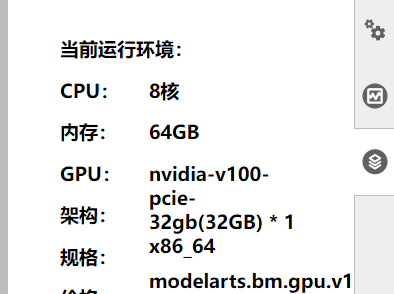

In [12]:
trainer.run(tgt_columns="labels")

The train will start from the checkpoint saved in 'checkpoint'.


Epoch 0: 100%|██████████| 4375/4375 [26:34<00:00,  2.74it/s, loss=0.25768444]


Checkpoint: 'gpt_imdb_finetune_epoch_0.ckpt' has been saved in epoch: 0.


Evaluate: 100%|██████████| 4375/4375 [07:36<00:00,  9.59it/s]


Evaluate Score: {'Accuracy': 0.9557142857142857}
---------------Best Model: 'gpt_imdb_finetune_best.ckpt' has been saved in epoch: 0.---------------


Epoch 1: 100%|██████████| 4375/4375 [26:22<00:00,  2.76it/s, loss=0.16339678]


Checkpoint: 'gpt_imdb_finetune_epoch_1.ckpt' has been saved in epoch: 1.


Evaluate: 100%|██████████| 4375/4375 [07:17<00:00,  9.99it/s]


Evaluate Score: {'Accuracy': 0.9760571428571428}
---------------Best Model: 'gpt_imdb_finetune_best.ckpt' has been saved in epoch: 1.---------------


Epoch 2: 100%|██████████| 4375/4375 [26:16<00:00,  2.78it/s, loss=0.10065899] 


The maximum number of stored checkpoints has been reached.
Checkpoint: 'gpt_imdb_finetune_epoch_2.ckpt' has been saved in epoch: 2.


Evaluate: 100%|██████████| 4375/4375 [07:14<00:00, 10.07it/s]


Evaluate Score: {'Accuracy': 0.9842857142857143}
---------------Best Model: 'gpt_imdb_finetune_best.ckpt' has been saved in epoch: 2.---------------
Loading best model from 'checkpoint' with '['Accuracy']': [0.9842857142857143]...
---------------The model is already load the best model from 'gpt_imdb_finetune_best.ckpt'.---------------


In [13]:
# 微调了GPT预训练模型后，最后看看其在此次文本情感识别（文本分类任务）数据集中的测试集上效果
evaluator = Evaluator(network=model, eval_dataset=dataset_test, metrics=metric)
evaluator.run(tgt_columns="labels")

Evaluate: 100%|██████████| 6250/6250 [10:06<00:00, 10.31it/s]

Evaluate Score: {'Accuracy': 0.9274}
